#### Reading csv graydon data from buckets
#### Merging csv monthly files into yearly files
#### Uploading yearly files to Google Storage

In [1]:
# Ignore 'dask' warning
import pandas as pd
import gcsfs
from google.cloud import storage
from pandas import DataFrame
from IPython.display import HTML
from google.cloud.storage import Blob
import datalab.storage as gcs_datalab

In [2]:
# Setting up constants. All required
project = 'graydon-moving-indicator'
bucket_name = 'graydon-data'

In [3]:
# Initializing bucket
fs = gcsfs.GCSFileSystem(project='graydon-moving-indicator')
gcs = storage.Client()
bucket = gcs.get_bucket(bucket_name)

In [4]:
selected_columns = ['date_month', 'id_company', 'id_branch',
       'is_discontinued',
       'financial_calamity_outcome',
       'qty_employees', 'year_qty_employees', 'id_company_creditproxy',
       'score_payment_assessment', 'amt_revenue',
       'year_revenue', 'amt_consolidated_revenue', 'year_consolidated_revenue',
       'amt_consolidated_operating_result',
       'year_consolidated_operating_result', 
       'perc_credit_limit_adjustment', 'color_credit_status', 'rat_pd',
       'score_pd','has_increased_risk',
       'is_sole_proprietor', 'code_SBI_2', 'code_SBI_1',
       'qty_address_mutations_total',
       'qty_address_mutations_month', 
       'has_relocated',
       'has_name_change',  'Vice President'
       ]

In [5]:
selected_columns_small = ['date_month', 'id_company', 'id_branch', 'date_established',
       'is_discontinued',
       'financial_calamity_outcome',
       'qty_employees', 'year_qty_employees', 'id_company_creditproxy',
       'score_payment_assessment', 'amt_revenue',
       'year_revenue', 'amt_consolidated_revenue', 'year_consolidated_revenue',
       'perc_credit_limit_adjustment', 'color_credit_status', 'rat_pd',
       'score_pd','has_increased_risk',
       'is_sole_proprietor', 'code_SBI_2', 'code_SBI_1', 'qty_address_mutations_total',
       'qty_address_mutations_month', 'has_relocated',
        'has_name_change'
       ]

In [31]:
#%%time
def read_one_year_from_bucket_merged_csv(year, dir_prefix = ''):
    """ Reads a whole year of data from the already merged files """
    full_year_df = pd.DataFrame()
    print('Starting with year: ', year)
    print(dir_prefix)
    blob_list = list(bucket.list_blobs(prefix=dir_prefix))    
    for blob in blob_list:  
        print("blob", blob.name)
        if year in blob.name:
            print('Processing file: ', blob.name)
            with fs.open('graydon-data/' + blob.name) as f:
                full_year_df = pd.read_csv(f, sep=',')   
        print('The number of rows so far is: ', full_year_df.shape[0])
    return full_year_df

In [7]:
def save_df_locally(df, dir_prefix, year, as_json= False):
    """ Saves df as json or csv locally on server """
    if as_json:        
        file_path = dir_prefix + '/' + year + '_merged.json'
        df.to_json(file_path)
    else:
        file_path =  dir_prefix + '/' + year + '_merged.csv'
        df.to_csv(file_path)
        

#### Read one full year from already merged files

In [32]:
one_year_df = read_one_year_from_bucket_merged_csv(dir_prefix= 'including_scores/merged_per_year', year = '2017')

Starting with year:  2017
including_scores/merged_per_year
blob including_scores/merged_per_year/
The number of rows so far is:  0
blob including_scores/merged_per_year/2016_merged.csv
The number of rows so far is:  0
blob including_scores/merged_per_year/2017_merged.csv
Processing file:  including_scores/merged_per_year/2017_merged.csv


/home/mrodriguezlara/graydon/graydon-moving/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (8,23) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


The number of rows so far is:  22729762
blob including_scores/merged_per_year/2018_merged.csv
The number of rows so far is:  22729762


# Inspect Data:

In [33]:
one_year_df.shape

(22729762, 29)

#### Preview df

In [34]:
HTML(DataFrame(one_year_df.head(20)).to_html())

,Unnamed: 0,date_month,id_company,id_branch,is_discontinued,financial_calamity_outcome,qty_employees,year_qty_employees,id_company_creditproxy,score_payment_assessment,amt_revenue,year_revenue,amt_consolidated_revenue,year_consolidated_revenue,amt_consolidated_operating_result,year_consolidated_operating_result,perc_credit_limit_adjustment,color_credit_status,rat_pd,score_pd,has_increased_risk,is_sole_proprietor,code_sbi_2,code_sbi_1,qty_address_mutations_total,qty_address_mutations_month,has_relocated,has_name_change,vice_president
0,0,2017-01-01,3,10079408,False,NaN,1,2017,3,21.0,"3,552530e-316",2009,"4,954293e-316",2015,"2,346812e-318",2015,15,G,CCC,"-4,907",False,False,64.0,NaN,0,0,False,False,0
1,1,2017-01-01,5,10079416,False,NaN,9,2017,1064993,20.0,NA,NA,NA,NA,NA,NA,5,G,A,"-4,892",False,False,46.0,NaN,0,0,False,False,0
2,2,2017-01-01,6,10079424,False,NaN,25,2014,6,24.0,"4,446591e-317",2011,NA,NA,NA,NA,-100,R,D,NA,NaN,False,41.0,NaN,0,0,False,False,0
3,3,2017-01-01,9,10079432,False,NaN,45,2017,9,20.0,NA,NA,NA,NA,NA,NA,25,G,CCC,"-4,998",False,False,47.0,NaN,0,0,False,False,0
4,4,2017-01-01,12,35,False,NaN,5,2017,12,28.0,NA,NA,NA,NA,NA,NA,30,G,BB,"-5,096",False,False,64.0,NaN,0,0,False,False,0
5,5,2017-01-01,14,43,False,NaN,6,2017,14,20.0,NA,NA,NA,NA,NA,NA,45,G,BBB,"-5,005",False,False,64.0,NaN,0,0,False,False,0
6,6,2017-01-01,17,51,False,NaN,1,2017,17,20.0,NA,NA,NA,NA,NA,NA,20,G,A,"-5,014",False,False,64.0,NaN,0,0,False,False,0
7,7,2017-01-01,23,94,True,NaN,NA,NA,23,29.0,NA,NA,NA,NA,NA,NA,-5,R,D,NA,NaN,False,46.0,NaN,0,0,False,False,0
8,8,2017-01-01,25,10079467,True,NaN,NA,NA,25,29.0,NA,NA,NA,NA,NA,NA,0,R,D,NA,NaN,False,61.0,NaN,0,0,False,False,0
9,9,2017-01-01,47,140,False,NaN,1,2007,47,20.0,NA,NA,NA,NA,NA,NA,50,G,BBB,"-5,122",False,False,70.0,NaN,0,0,False,False,0


In [37]:
one_year_df['has_relocated'].value_counts()

False    22605016
True       124746
Name: has_relocated, dtype: int64

In [44]:
one_year_df['is_sole_proprietor'].value_counts()

False    22729762
Name: is_sole_proprietor, dtype: int64

In [38]:
one_year_df['has_relocated'].value_counts()/one_year_df.shape[0]

False    0.994512
True     0.005488
Name: has_relocated, dtype: float64

In [39]:
one_year_df['id_company'].value_counts()

890460183    14061
927776979    13068
890279780     9624
80559         8172
324324        6641
420124        6438
568709        5386
891113940     5209
888945809     4843
854287        4752
905228146     4572
906052041     4545
901379883     4428
903945681     4358
891751068     4328
958872        4200
899033520     4080
101259        3964
93178         3869
913957208     3853
911331255     3733
1001695       3645
915915782     3489
263515        3428
910623678     3420
898109906     3416
898903777     3351
893106836     3338
897515846     3281
294741        3228
             ...  
940884720        1
940772825        1
934906394        1
940794616        1
940736136        1
940301954        1
940835061        1
940972816        1
940975440        1
940866684        1
940843862        1
940904837        1
940844451        1
930737695        1
940945142        1
940853973        1
940747766        1
931098319        1
940793652        1
921581955        1
940969815        1
940843536   

In [39]:
one_year_df[one_year_df['']]['id_company'].value_counts()

890460183    14061
927776979    13068
890279780     9624
80559         8172
324324        6641
420124        6438
568709        5386
891113940     5209
888945809     4843
854287        4752
905228146     4572
906052041     4545
901379883     4428
903945681     4358
891751068     4328
958872        4200
899033520     4080
101259        3964
93178         3869
913957208     3853
911331255     3733
1001695       3645
915915782     3489
263515        3428
910623678     3420
898109906     3416
898903777     3351
893106836     3338
897515846     3281
294741        3228
             ...  
940884720        1
940772825        1
934906394        1
940794616        1
940736136        1
940301954        1
940835061        1
940972816        1
940975440        1
940866684        1
940843862        1
940904837        1
940844451        1
930737695        1
940945142        1
940853973        1
940747766        1
931098319        1
940793652        1
921581955        1
940969815        1
940843536   

In [41]:
one_year_df[one_year_df['id_company']==890460183][:3]

,Unnamed: 0,date_month,id_company,id_branch,is_discontinued,financial_calamity_outcome,qty_employees,year_qty_employees,id_company_creditproxy,score_payment_assessment,...,score_pd,has_increased_risk,is_sole_proprietor,code_sbi_2,code_sbi_1,qty_address_mutations_total,qty_address_mutations_month,has_relocated,has_name_change,vice_president
342268,430754,2017-01-01,890460183,15313182,False,NaN,4161,2017,926579789,20.0,...,"-5,730",False,False,64.0,NaN,0,0,False,False,0
342269,430755,2017-01-01,890460183,53883578,False,NaN,4161,2017,926579789,20.0,...,"-5,730",False,False,64.0,NaN,0,0,False,False,0
342270,430756,2017-01-01,890460183,54324688,False,NaN,4161,2017,926579789,20.0,...,"-5,730",False,False,64.0,NaN,0,0,False,False,0


In [47]:
one_year_df[one_year_df['id_company']==890460183]['score_payment_assessment'].describe()

count    14061.0
mean        20.0
std          0.0
min         20.0
25%         20.0
50%         20.0
75%         20.0
max         20.0
Name: score_payment_assessment, dtype: float64

In [42]:
one_year_df[one_year_df['id_company']==940902168][:3]

,Unnamed: 0,date_month,id_company,id_branch,is_discontinued,financial_calamity_outcome,qty_employees,year_qty_employees,id_company_creditproxy,score_payment_assessment,...,score_pd,has_increased_risk,is_sole_proprietor,code_sbi_2,code_sbi_1,qty_address_mutations_total,qty_address_mutations_month,has_relocated,has_name_change,vice_president
22702913,3060659,2017-12-01,940902168,69810567,False,NaN,1,2017,940902168,0.0,...,NA,NaN,False,64.0,NaN,0,0,False,False,0


In [57]:
one_year_df.dtypes

Unnamed: 0                              int64
date_month                             object
id_company                              int64
id_branch                               int64
is_discontinued                          bool
financial_calamity_outcome            float64
qty_employees                          object
year_qty_employees                     object
id_company_creditproxy                 object
score_payment_assessment              float64
amt_revenue                            object
year_revenue                           object
amt_consolidated_revenue               object
year_consolidated_revenue              object
amt_consolidated_operating_result      object
year_consolidated_operating_result     object
perc_credit_limit_adjustment            int64
color_credit_status                    object
rat_pd                                 object
score_pd                               object
has_increased_risk                     object
is_sole_proprietor                

In [59]:
type(one_year_df['qty_employees'])
#['has_relocated'].value_counts()

pandas.core.series.Series

In [61]:
one_year_df['qty_employees'>1][:2]
#['has_relocated'].value_counts()

TypeError: unorderable types: str() > int()

In [75]:
one_year_df['qty_employees'] = one_year_df['qty_employees'].fillna(0)

In [76]:
one_year_df.loc[one_year_df['qty_employees']=='    NA', 'qty_employees'] = 0


In [78]:
one_year_df['qty_employees'] = one_year_df['qty_employees'].astype(float)

In [79]:
one_year_df['score_pd'] = one_year_df['score_pd'].fillna(0)

In [81]:
one_year_df.loc[one_year_df['score_pd']=='    NA', 'score_pd'] = 0


In [86]:
one_year_df['code_sbi_2'].describe()

count    2.220786e+07
mean     6.691211e+01
std      1.973313e+01
min      1.000000e+01
25%      5.600000e+01
50%      6.400000e+01
75%      8.600000e+01
max      9.900000e+01
Name: code_sbi_2, dtype: float64

In [87]:
import numpy as np

In [88]:
np.mean(one_year_df['code_sbi_2'])

66.91211481375896

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
logisticRegr = LogisticRegression()

In [93]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(one_year_df.code_sbi_2, one_year_df.has_relocated, test_size=0.25, random_state=0)

In [94]:
logisticRegr.fit(x_train, y_train)

/home/mrodriguezlara/graydon/graydon-moving/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Expected 2D array, got 1D array instead:
array=[64. 10. 46. ... 64. 94. 68.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [98]:
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

In [99]:
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [109]:
data = one_year_df[['code_sbi_2', 'score_payment_assessment', 'has_relocated']]
print(data.shape)
print(list(data.columns))

(22729762, 3)
['code_sbi_2', 'score_payment_assessment', 'has_relocated']


In [110]:
data.head()

,code_sbi_2,score_payment_assessment,has_relocated
0,64.0,21.0,False
1,46.0,20.0,False
2,41.0,24.0,False
3,47.0,20.0,False
4,64.0,28.0,False


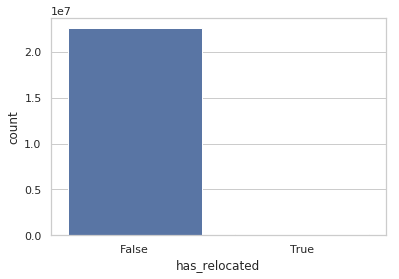

In [106]:
sns.countplot(x='has_relocated',data=data)
plt.show()


In [111]:
X = data.iloc[:,0:2]
y = data.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [112]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

/home/mrodriguezlara/graydon/graydon-moving/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').